In [2]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt

plotting.setup_mpl()

In [3]:
session = ff1.get_session(2023, 'Spain', 'Q')
session.load()

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v2.3.0]
api            INFO 	Fetching driver list...
C:\Users\Imran\anaconda3\lib\site-packages\fastf1\ergast.py:67: UserWarning: Request returned: 503
  warnings.warn(f"Request returned: {r.status_code}")
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api     

In [4]:
ver_lap = session.laps.pick_driver('VER').pick_fastest()
sai_lap = session.laps.pick_driver('SAI').pick_fastest()

ver_lap = ver_lap.get_car_data().add_distance()
sai_lap = sai_lap.get_car_data().add_distance()

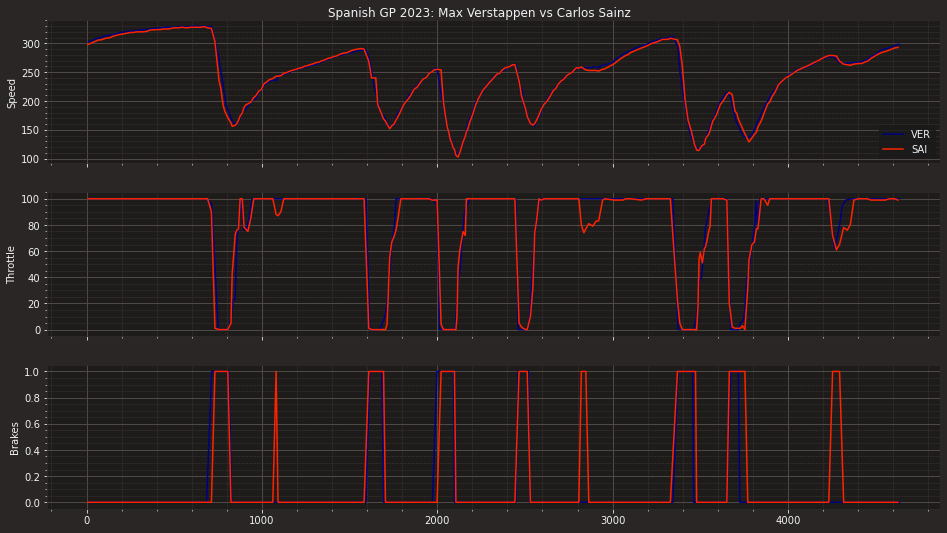

In [9]:
fig, ax = plt.subplots(3, figsize = (16, 9))
fig.suptitle("Spanish GP 2023: Max Verstappen vs Carlos Sainz", y=0.9)

ax[0].plot(ver_lap['Distance'], ver_lap['Speed'], color='navy', label='VER')
ax[0].plot(sai_lap['Distance'], sai_lap['Speed'], color='#FF2400', label='SAI')
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")

ax[1].plot(ver_lap['Distance'], ver_lap['Throttle'], color='navy', label='VER')
ax[1].plot(sai_lap['Distance'], sai_lap['Throttle'], color='#FF2400', label='SAI')
ax[1].set(ylabel='Throttle')

ax[2].plot(ver_lap['Distance'], ver_lap['Brake'], color='navy', label='VER')
ax[2].plot(sai_lap['Distance'], sai_lap['Brake'], color='#FF2400', label='SAI')
ax[2].set(ylabel='Brakes')

for a in ax.flat:
    a.label_outer()
    
plt.show()

In [10]:
fig.savefig('Spanish GP 2023 Qualifying: Max Verstappen vs Carlos Sainz.png', dpi = 350)